
# 小地域の収入推定

```Data```フォルダには、小地域の収入データ(```income_district.csv```)と国勢調査の小地域集計データが格納されています。

国勢調査の小地域集計データ（人口構成、労働力構成、住宅形態など）から、その地域の収入を推定することが考えられます。推定のための機械学習・深層学習モデルを構築しなさい。


- データを観察・理解する上で、データの構造を説明しながら、適切なデータ整形を行いなさい
- データ構造や分析結果に対して、少なくとも二つの図で可視化を行いなさい
- モデルの精度を評価し、できるだけ精度が高いモデルを得るよう、適切な特徴量エンジニアリングやモデル選定の考えもまとめなさい


In [1]:
import pandas as pd

In [2]:
income=pd.read_csv(r"C:\Users\moris\Downloads\income_district.csv")
age=pd.read_csv(r"C:\Users\moris\Downloads\h27_age_df.csv")


In [3]:
display(income.head(), age.head())
display(len(income), len(age))

,area_code,income_mean
0,13228,480.984419
1,43514,439.775281
2,23237,487.507769
3,18208,505.495103
4,12238,385.423846


,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,10-14,15-19,20-24,...,55-59_female,60-64_female,65-69_female,70-74_female,75-79_female,80-84_female,85-89_female,90-94_female,95-99_female,100_female
0,45201,NaN,1,宮崎県,宮崎市,NaN,NaN,19220,20777,17510,...,13420,15035,16040,11697,10052,9160,6430,3357,1021,208
1,45201,10.0,2,宮崎県,宮崎市,橘通西,NaN,32,56,61,...,35,47,43,44,20,16,9,5,3,1
2,45201,1001.0,3,宮崎県,宮崎市,橘通西,１丁目,9,6,11,...,15,15,16,14,7,7,4,3,-,-
3,45201,1002.0,3,宮崎県,宮崎市,橘通西,２丁目,2,10,18,...,4,10,11,14,2,2,3,1,3,1
4,45201,1003.0,3,宮崎県,宮崎市,橘通西,３丁目,-,1,-,...,1,-,-,2,-,1,-,-,-,-


1245

251258

In [4]:
age

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,10-14,15-19,20-24,...,55-59_female,60-64_female,65-69_female,70-74_female,75-79_female,80-84_female,85-89_female,90-94_female,95-99_female,100_female
0,45201,NaN,1,宮崎県,宮崎市,NaN,NaN,19220,20777,17510,...,13420,15035,16040,11697,10052,9160,6430,3357,1021,208
1,45201,10.0,2,宮崎県,宮崎市,橘通西,NaN,32,56,61,...,35,47,43,44,20,16,9,5,3,1
2,45201,1001.0,3,宮崎県,宮崎市,橘通西,１丁目,9,6,11,...,15,15,16,14,7,7,4,3,-,-
3,45201,1002.0,3,宮崎県,宮崎市,橘通西,２丁目,2,10,18,...,4,10,11,14,2,2,3,1,3,1
4,45201,1003.0,3,宮崎県,宮崎市,橘通西,３丁目,-,1,-,...,1,-,-,2,-,1,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251253,8564,23001.0,3,茨城県,北相馬郡利根町,もえぎ野台,１丁目,26,20,5,...,8,7,14,7,7,5,11,9,4,3
251254,8564,23002.0,3,茨城県,北相馬郡利根町,もえぎ野台,２丁目,14,16,4,...,3,2,3,3,1,2,-,-,-,-
251255,8564,23003.0,3,茨城県,北相馬郡利根町,もえぎ野台,３丁目,39,20,13,...,4,16,15,8,2,1,-,-,-,-
251256,8564,23004.0,3,茨城県,北相馬郡利根町,もえぎ野台,４丁目,17,25,18,...,10,18,11,6,-,3,1,-,-,-


In [5]:
#市のデータのみを抽出
#（`districr2_id`が一番大きいデータであるため）
age_2 = age[age["district2_id"].isna()]
age_2

,district_id,district2_id,level_identifier,state_name,city_name,district_name,district2_name,10-14,15-19,20-24,...,55-59_female,60-64_female,65-69_female,70-74_female,75-79_female,80-84_female,85-89_female,90-94_female,95-99_female,100_female
0,45201,NaN,1,宮崎県,宮崎市,NaN,NaN,19220,20777,17510,...,13420,15035,16040,11697,10052,9160,6430,3357,1021,208
620,45202,NaN,1,宮崎県,都城市,NaN,NaN,7897,7689,6393,...,5850,6657,6568,5028,5154,4961,3732,1763,527,123
886,45203,NaN,1,宮崎県,延岡市,NaN,NaN,5950,5980,4499,...,4386,5206,5453,4253,4282,4115,2895,1402,413,68
1265,45204,NaN,1,宮崎県,日南市,NaN,NaN,2187,2294,1807,...,2011,2318,2445,2036,2073,2048,1440,743,222,33
1548,45205,NaN,1,宮崎県,小林市,NaN,NaN,2056,1962,1279,...,1766,1969,1964,1609,1685,1632,1266,737,227,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251086,8447,NaN,1,茨城県,稲敷郡河内町,NaN,NaN,347,437,381,...,339,361,407,320,362,333,236,91,30,4
251112,8521,NaN,1,茨城県,結城郡八千代町,NaN,NaN,1095,1071,1062,...,782,898,858,591,528,511,455,228,51,9
251162,8542,NaN,1,茨城県,猿島郡五霞町,NaN,NaN,358,389,393,...,343,415,369,260,222,166,164,78,18,4
251181,8546,NaN,1,茨城県,猿島郡境町,NaN,NaN,1227,1175,1089,...,814,996,978,691,611,563,397,229,67,4


In [6]:
#
age_3 = age_2[["district_id"] + age_2.columns[7:26].tolist()]
age_3

,district_id,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100
0,45201,19220,20777,17510,18611,22131,26144,29081,25070,24686,25425,28638,30260,21673,17872,15095,9741,4347,1250,237
620,45202,7897,7689,6393,7661,9132,9783,10200,8775,9707,11366,12789,12870,9228,8943,8083,5453,2274,642,133
886,45203,5950,5980,4499,5139,6176,7096,7846,6846,7538,8356,9900,10505,7678,7350,6713,4269,1805,503,81
1265,45204,2187,2294,1807,1957,2548,2813,2904,2634,3242,4012,4555,4702,3760,3614,3352,2193,962,265,36
1548,45205,2056,1962,1279,1788,2315,2515,2475,2278,2722,3373,3912,3796,2930,2872,2744,1918,933,267,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251086,8447,347,437,381,383,347,428,549,592,652,692,771,847,629,653,505,354,121,33,4
251112,8521,1095,1071,1062,1197,1232,1425,1401,1249,1267,1586,1843,1761,1161,991,842,689,311,62,9
251162,8542,358,389,393,469,416,515,557,545,574,673,874,823,514,428,272,241,102,22,5
251181,8546,1227,1175,1089,1111,1398,1543,1837,1554,1501,1660,1964,2027,1385,1120,937,605,299,75,5


In [7]:
#データを合併
data = pd.merge(income, age_3, how = "outer",
                 left_on="area_code", right_on="district_id")
#欠損値処理などでまとめて指定するために"district_id"を消す
data = data.drop(columns=["district_id"])
data

,area_code,income_mean,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100
0,13228.0,480.984419,3913,4111,3783,3563,3894,4963,6498,5849,...,4470,5173,6308,5819,4411,3051,1812,854,261,49
1,43514.0,439.775281,776,598,387,547,672,788,819,832,...,1093,1377,1312,959,1010,984,709,293,79,12
2,23237.0,487.507769,4484,4436,3874,4124,4825,6093,7858,6477,...,4222,4841,6893,6094,4571,2732,1237,453,90,21
3,18208.0,505.495103,1211,1324,1220,1328,1400,1512,1863,1699,...,1980,2287,2537,1784,1525,1427,999,462,121,15
4,12238.0,385.423846,1373,1493,1181,1286,1691,1894,2307,2218,...,2607,3208,3881,3228,2655,2311,1654,723,192,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,NaN,NaN,340,416,351,287,376,450,474,523,...,733,893,949,717,648,653,561,247,87,10
1899,NaN,NaN,211,250,173,185,218,301,374,384,...,436,632,945,804,660,491,381,142,41,14
1900,NaN,NaN,283,294,215,187,268,341,405,417,...,569,713,943,740,627,562,402,174,35,9
1901,NaN,NaN,347,437,381,383,347,428,549,592,...,692,771,847,629,653,505,354,121,33,4


In [8]:
#欠損値の処理。SimpleImputerで中央値で置き換え
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

#"-"をNaNに変換
import numpy as np
data.replace("-", np.nan, inplace=True)

data.iloc[:, 1:] = imputer.fit_transform(data.iloc[:, 1:])
data

,area_code,income_mean,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100
0,13228.0,480.984419,3913.0,4111.0,3783.0,3563.0,3894.0,4963.0,6498.0,5849.0,...,4470.0,5173.0,6308.0,5819.0,4411.0,3051.0,1812.0,854.0,261.0,49.0
1,43514.0,439.775281,776.0,598.0,387.0,547.0,672.0,788.0,819.0,832.0,...,1093.0,1377.0,1312.0,959.0,1010.0,984.0,709.0,293.0,79.0,12.0
2,23237.0,487.507769,4484.0,4436.0,3874.0,4124.0,4825.0,6093.0,7858.0,6477.0,...,4222.0,4841.0,6893.0,6094.0,4571.0,2732.0,1237.0,453.0,90.0,21.0
3,18208.0,505.495103,1211.0,1324.0,1220.0,1328.0,1400.0,1512.0,1863.0,1699.0,...,1980.0,2287.0,2537.0,1784.0,1525.0,1427.0,999.0,462.0,121.0,15.0
4,12238.0,385.423846,1373.0,1493.0,1181.0,1286.0,1691.0,1894.0,2307.0,2218.0,...,2607.0,3208.0,3881.0,3228.0,2655.0,2311.0,1654.0,723.0,192.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,NaN,453.735961,340.0,416.0,351.0,287.0,376.0,450.0,474.0,523.0,...,733.0,893.0,949.0,717.0,648.0,653.0,561.0,247.0,87.0,10.0
1899,NaN,453.735961,211.0,250.0,173.0,185.0,218.0,301.0,374.0,384.0,...,436.0,632.0,945.0,804.0,660.0,491.0,381.0,142.0,41.0,14.0
1900,NaN,453.735961,283.0,294.0,215.0,187.0,268.0,341.0,405.0,417.0,...,569.0,713.0,943.0,740.0,627.0,562.0,402.0,174.0,35.0,9.0
1901,NaN,453.735961,347.0,437.0,381.0,383.0,347.0,428.0,549.0,592.0,...,692.0,771.0,847.0,629.0,653.0,505.0,354.0,121.0,33.0,4.0


In [9]:
#スケーリング(正規化)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data.iloc[:,1:] = scaler.fit_transform(data.iloc[:,1:])
data

,area_code,income_mean,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,...,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100
0,13228.0,0.483088,0.124606,0.110176,0.079181,0.069657,0.062578,0.069954,0.085088,0.081712,...,0.08961,0.116341,0.121223,0.138987,0.12617,0.107168,0.099162,0.115991,0.137059,0.125654
1,43514.0,0.394237,0.024634,0.015981,0.008081,0.010677,0.010639,0.010988,0.010598,0.011479,...,0.021851,0.030936,0.025137,0.022886,0.028845,0.03454,0.038767,0.039706,0.041118,0.028796
2,23237.0,0.497153,0.142803,0.11889,0.081086,0.080628,0.077585,0.085913,0.102926,0.090503,...,0.084634,0.108871,0.132474,0.145557,0.130748,0.095959,0.067678,0.061463,0.046916,0.052356
3,18208.0,0.535935,0.038497,0.035447,0.025521,0.02595,0.022374,0.021213,0.024292,0.023616,...,0.039648,0.05141,0.048697,0.042594,0.043583,0.050105,0.054646,0.062687,0.063258,0.036649
4,12238.0,0.277050,0.04366,0.039979,0.024705,0.025129,0.027065,0.026609,0.030116,0.030882,...,0.052229,0.072131,0.074546,0.07709,0.075919,0.081167,0.090511,0.098178,0.100685,0.089005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1898,NaN,0.424338,0.01074,0.011101,0.007328,0.005593,0.005868,0.006214,0.006073,0.007153,...,0.014627,0.020046,0.018156,0.017105,0.018486,0.022909,0.030663,0.033451,0.045335,0.02356
1899,NaN,0.424338,0.006629,0.00665,0.003601,0.003598,0.003321,0.00411,0.004761,0.005208,...,0.008668,0.014174,0.018079,0.019183,0.01883,0.017217,0.020807,0.019173,0.021086,0.034031
1900,NaN,0.424338,0.008923,0.007829,0.00448,0.003637,0.004127,0.004675,0.005168,0.00567,...,0.011337,0.015997,0.01804,0.017654,0.017885,0.019712,0.021957,0.023525,0.017923,0.020942
1901,NaN,0.424338,0.010963,0.011664,0.007956,0.00747,0.0054,0.005904,0.007057,0.008119,...,0.013805,0.017302,0.016194,0.015002,0.018629,0.017709,0.019329,0.016318,0.016869,0.007853


In [10]:
#機械学習
from sklearn.model_selection import train_test_split #訓練データとテストデータの分割
from sklearn.linear_model import LinearRegression #線形回帰
from sklearn.metrics import mean_squared_error

In [11]:
#特徴量（独立変数）とターゲット（従属変数）を分ける
X = data.iloc[:,2:] #年齢の列
y = data[["income_mean"]] #平均所得 

assert len(X) == len(y) #ケース数の確認

In [12]:
#訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
#機械学習の実行
model=LinearRegression() # 線形回帰モデル
model.fit(X_train,y_train) # モデルを訓練データに適合
y_predicted=model.predict(X_test) # テストデータで予測

In [14]:
data.columns.get_loc("25-29")
data.columns.get_loc("65-69")

13

In [15]:
#可視化の準備
income_mean = data.iloc[:,1]
age_20 = data.iloc[:,5] #25-29
age_65 = data.iloc[:,13] #65-69


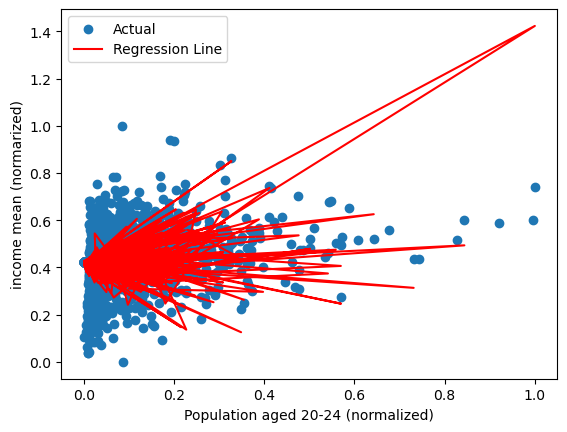

In [16]:
#可視化1:20－24歳人口
import matplotlib.pyplot as plt

#図と座標軸の作成
fig, ax = plt.subplots()

#プロット
##実際のデータ
ax.scatter(age_20, income_mean, label = "Actual")


##予測データ
ax.plot(X_test.iloc[:,3], y_predicted, color = "red", label = "Regression Line")

#ラベルの指定
ax.set_xlabel("Population aged 20-24 (normalized)")
ax.set_ylabel("income mean (normarized)")

#凡例
ax.legend()

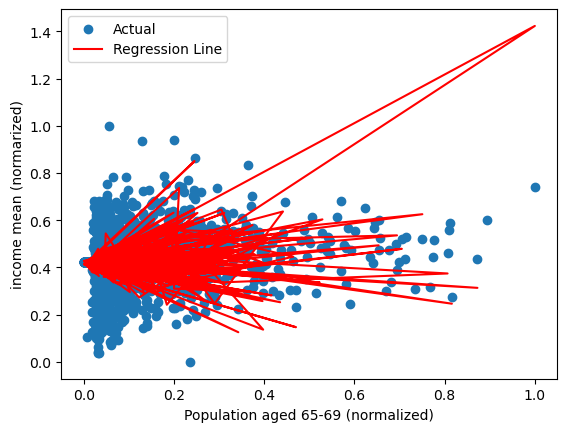

In [17]:
#可視化2:65－69歳人口
import matplotlib.pyplot as plt

#図と座標軸の作成
fig, ax = plt.subplots()

#プロット
##実際のデータ
ax.scatter(age_65, income_mean, label = "Actual")


##予測データ
ax.plot(X_test.iloc[:,11], y_predicted, color = "red", label = "Regression Line")

#ラベルの指定
ax.set_xlabel("Population aged 65-69 (normalized)")
ax.set_ylabel("income mean (normarized)")

#凡例
ax.legend()

In [ ]:
print(X_test.iloc[:, 3].shape)
print(X_test.iloc[:, 11].shape)
print(y_predicted.shape)



(571,)
(571,)
(571, 1)


In [ ]:
#モデルの精度の評価
mean_squared_error(y_test,y_predicted) # 予測精度（平均二乗誤差）の評価

0.008096656728363124

以下では精度を高めるための考察を行う。

まず、本モデルでは年齢データから平均所得の推定を行った。そこでの評価としては0.8％という結果であった。この結果は必ずしも高くない。その理由についてはいくつか考えられる。

第一に年齢によって平均賃金は変化するが、年齢の構成だけでは十分ではないということが考えられる。たとえ若い人たちが集まっていたとしても、彼らの仕事の所得が高いとは限らない。例えば近年のサービス産業化は、ホワイトカラー低所得者を多く生むということからも予想の根拠になる。

第二に使用する変数が年齢に限られていたという点も関係しているかもしれない。こちらも先ほどの考察に関係するが、教育機関や産業などを考慮することでモデルを改善できるかもしれない。

以上を踏まえて今後、モデルの制度を高めるために大きく2点を指摘する。まず使用する変数を増やす。機械学習においてはモデルの設定次第で精度の高さを実現できるため、いろいろな変数を投入し手見ることが有効だと考える。もう一点、これまでの選好研究が指摘してきた所得に関連のある変数、例えば教育機関や職業分布などを投入することが重要になると考える。

今回は年齢だけで実施したため、変数の組み合わせ次第で様々な拡張可能性があると考える。